In [2]:
## Our own library
from BackBone.preprocessing import loader
from BackBone.tools import output, model_viz, Input_tools
from BackBone import config as cfg

In [3]:
##### Standard python packages
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")


In [4]:
## Providing input filename and year
filename = "Input_data_file.xlsx"


## Configuring paths
loader.configure_paths(filename)

In [5]:
# Plot imports
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set_style("darkgrid")
from matplotlib import cm, colors

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rcParams["figure.figsize"] = (8,6)

### Loading input datafiles

In [15]:
var_merged, cap_merged, result_merged = loader.output_loader_all()

In [16]:
capacity = cap_merged.groupby('Period').mean()['cap'].reset_index()

In [17]:
optimal = result_merged[result_merged['optimal']==1]
optimal = optimal.groupby(['scenario','iteration']).sum()[['S','SL','Revenue','SL_total']].reset_index()

In [18]:
Paretofront = result_merged[result_merged['Paretofront']!=1]
Paretofront = Paretofront[['scenario','iteration']]

In [19]:
fill_rate = Paretofront.merge(var_merged, how='left', on =['scenario','iteration'])
fill_rate = fill_rate.groupby(['Customer','Product_id','iteration','scenario']).sum()[['x','d','Demand']].reset_index()
fill_rate['fill_rate'] = fill_rate['x']/fill_rate['Demand']

In [21]:
fill_rate['scenario'].unique()

array(['BaseCase', 'Test_10', 'Test_10_5', 'Test_11', 'Test_12',
       'Test_15', 'Test_2', 'Test_5', 'Test_8'], dtype=object)

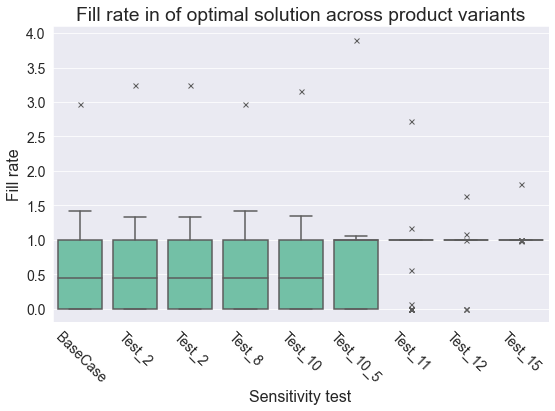

In [22]:
optimal_index = optimal[['iteration','scenario']]
optimal_fill = fill_rate.merge(optimal_index, how = 'right', on = ['iteration', 'scenario'])
optimal_fill = optimal_fill.pivot(index=['Customer', 'Product_id'], columns ='scenario', values = 'fill_rate' )

box = sns.boxplot(data=optimal_fill,  order = ['BaseCase','Test_2', 'Test_2', 'Test_8', 
'Test_10', 'Test_10_5', 'Test_11', 'Test_12', 'Test_15'], color="mediumaquamarine", flierprops={"marker": "x"})
box.set(xlabel='Sensitivity test',ylabel='Fill rate', title='Fill rate in of optimal solution across product variants')
plt.setp(box.get_xticklabels(), rotation=-45)
plt.tight_layout()
plt.show()
# optimal_fill.boxplot()flierprops={"marker": "x"}, medianprops={"color": "red"},

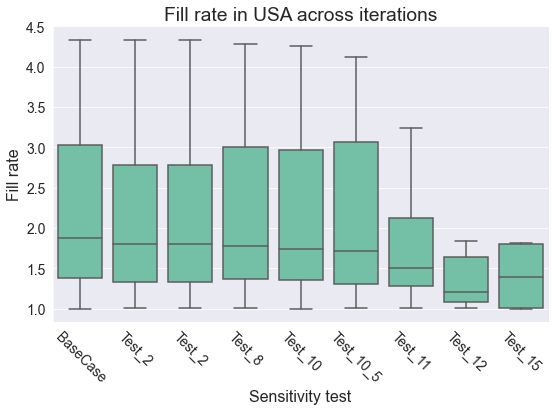

In [23]:
usa = fill_rate[(fill_rate['Customer']==400)]
usa = usa.pivot(index=['Customer', 'Product_id', 'iteration'], columns ='scenario', values = 'fill_rate' )
box = sns.boxplot(data=usa, order = ['BaseCase','Test_2', 'Test_2', 'Test_8', 
'Test_10', 'Test_10_5', 'Test_11', 'Test_12', 'Test_15'], color="mediumaquamarine", flierprops={"marker": "x"})
box.set(xlabel='Sensitivity test',ylabel='Fill rate', title='Fill rate in USA across iterations')
plt.setp(box.get_xticklabels(), rotation=-45)
plt.tight_layout()
plt.show()